## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откройте файл с данными и изучите общую информацию

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
pd.options.mode.chained_assignment = None 

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.min()

Platform             2600
Year_of_Release    1980.0
NA_sales              0.0
EU_sales              0.0
JP_sales              0.0
Other_sales           0.0
Critic_Score         13.0
dtype: object

In [5]:
data.max()

Platform             XOne
Year_of_Release    2016.0
NA_sales            41.36
EU_sales            28.96
JP_sales            10.22
Other_sales         10.57
Critic_Score         98.0
dtype: object

### Вывод

Таблицу изучила, есть пропущенные значения, есть столбцы, где нужно менять тип данных.
Посмотрела в общем минимум и максимум в столбцах, на первый взгляд нет ошибочных значений, оценки соответствуют указанным критериям.

## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

In [6]:
data.columns = map(str.lower, data.columns)
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [7]:
# год переведу в целочисленный тип на следующем этапе для моего удобства

# чтобы перевести user_score в float64 сначала уберу значение tbd, заменю на nan, так как на 0 менять не логично

data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64')

In [8]:
# проверим, как изменились типы данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

In [9]:
# посмотрим, в каких столбцах есть пропуски

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

1. В столбце name удалю 2 строки с отсутствующими названиями, так как в рамках выборки это 0,01%, то есть на результаты анализа не повлияют, а анализировать данные без названия игры нецелесообразно
2. столбец year_of_release попробую заменить пропуски по названию платформы
3. critic_score, user_score, rating - пропуски заменять не буду, так как замена на 0 потом скажется на результатах, а нам это не нужно. тем более, что тут так много пропусков.

In [10]:
# удаляю 2 строки с пустым значением названия игры

data = data.dropna(subset =['name'])

In [11]:
# Посмотрим, есть ли зависимость года выпуска от платформы
# Хочу это сделать для того, чтобы понять, можно ли заменить пропуски в столбце year_of_release на медианное значение, 
# рассчитанное по типу платформы

data_platform = data.pivot_table(index= 'platform', values= 'year_of_release', aggfunc= ['min', 'max']).reset_index()
display(data_platform)

,platform,min,max
,,year_of_release,year_of_release
0,2600,1980.0,1989.0
1,3DO,1994.0,1995.0
2,3DS,2011.0,2016.0
3,DC,1998.0,2008.0
4,DS,1985.0,2013.0
5,GB,1988.0,2001.0
6,GBA,2000.0,2007.0
7,GC,2001.0,2007.0
8,GEN,1990.0,1994.0


Думаю, что вполне можно опираться на такой вариант при заполнении пропусков.

In [12]:
print('Год выпуска. Пропуски до:', data['year_of_release'].isna().sum())

for platform_name in data['platform'].unique():
    median_year = data.loc[data['platform'] == platform_name, 'year_of_release'].median()  
    data.loc[(data['year_of_release'].isna()) & (data['platform'] == platform_name), 'year_of_release'] = median_year



data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].median())    
    
print('Год выпуска. Пропуски после:', data['year_of_release'].isna().sum())

Год выпуска. Пропуски до: 269
Год выпуска. Пропуски после: 0


In [13]:
# год передевем в целочисленный тип

data['year_of_release'] = data['year_of_release'].astype('Int64')

#### Вывод

В столбце name удалены 2 строки с отсутствующими названиями, так как в рамках выборки это 0,01%, то есть на результаты анализа не повлияют, а анализировать данные без названия игры нецелесообразно
Столбец year_of_release заменены пропуски на медианное значение по платформе
critic_score, user_score, rating - пропуски оставлены, так как замена на 0 потом скажется на результатах, а нам это не нужно. тем более, что тут так много пропусков. 

Причины, которые могли привести к пропускам: в столбцах critic_score, user_score и rating - не проводилась оценка, нет и результата. По столбцам name и year_of_release - думаю, что ошибка из-за человеческого фактора: не внесли значения.

Аббревиатура 'tbd' в столбце User_Score заменила на nan в прошлом пункте.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы.

In [15]:
data.pivot_table(index= 'year_of_release', values= 'name', aggfunc= 'count').reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


#### Вывод

Больше всего игр выпускалось в 2005-2011 годах.

### Посмотрите, как менялись продажи по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

<AxesSubplot:title={'center':'Продажи по годам'}, xlabel='year_of_release'>

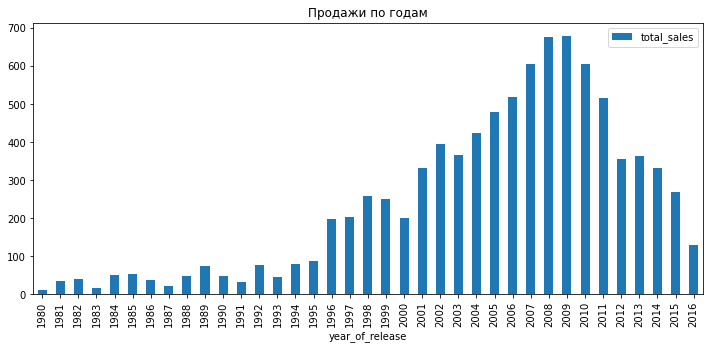

In [16]:
# посмотрим, как менялись продажи по платформам

data.pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(by='year_of_release').plot(kind='bar', title = "Продажи по годам", figsize = (12,5))

In [17]:
# Выберем платформы с наибольшими суммарными продажами

# достаем индекс
top = data.pivot_table(index= 'platform', values= 'total_sales', aggfunc= 'sum').sort_values(by='total_sales', ascending=False).head(15)
display(top)
# Взяла 6, так как предварительно проанализировала и после 6 строки был резкий спад суммарных продаж

top_6 = top.index.values

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


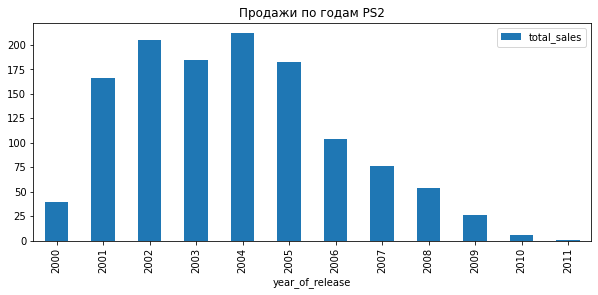

In [18]:
top_6_platform = data[data['platform'].isin(top_6)]

sales_ps2 =top_6_platform.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar', title = "Продажи по годам PS2", figsize = (10,4))
      

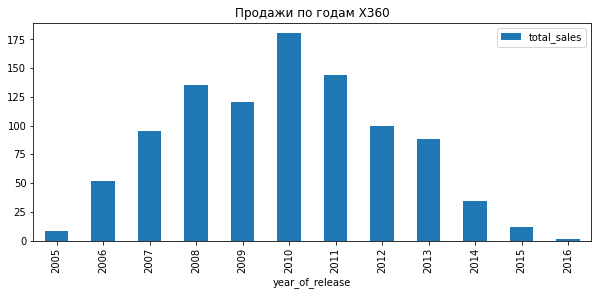

In [19]:
sales_x360 =top_6_platform.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar', title = "Продажи по годам X360", figsize = (10,4))

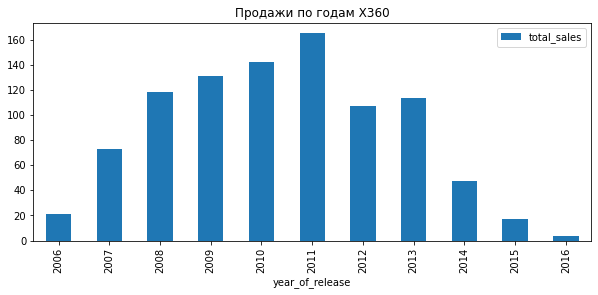

In [20]:
sales_ps3 =top_6_platform.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar', title = "Продажи по годам X360", figsize = (10,4))

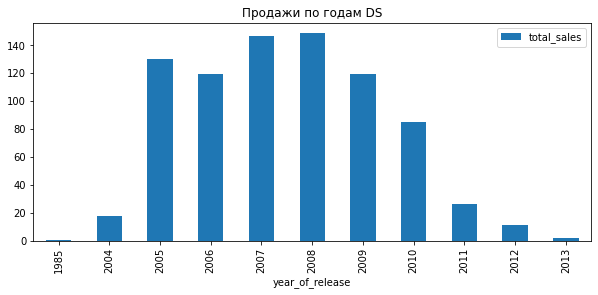

In [21]:
sales_ds =top_6_platform.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar', title = "Продажи по годам DS", figsize = (10,4))

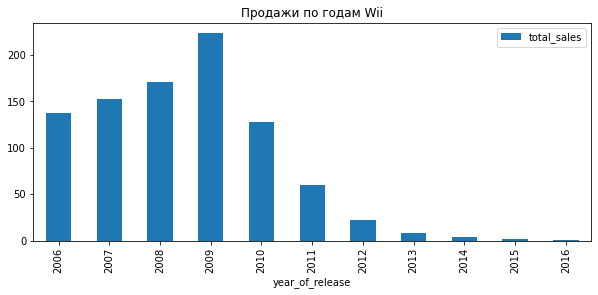

In [22]:
sales_wii =top_6_platform.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar', title = "Продажи по годам Wii", figsize = (10,4))

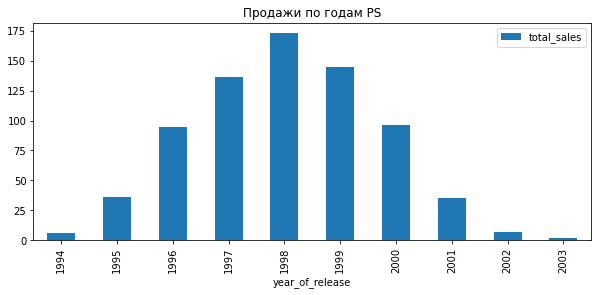

In [23]:
sales_ps =top_6_platform.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar', title = "Продажи по годам PS", figsize = (10,4))

In [24]:
# для того,чтобы посмотреть, за какой срок появляются и исчезают платформы, воспользуюсь уже созданной таблицей.
# создам корректные названия столбцов

data_platform.columns = ['platform', 'min_year', 'max_year']

<AxesSubplot:>

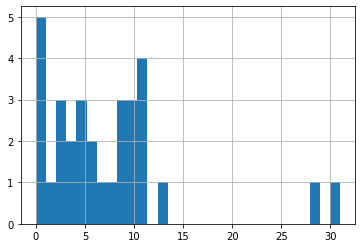

In [25]:
# столбец с данными, сколько лет выпускались игры на платформу и посмотрим на графике распределение

data_platform['delta'] = data_platform['max_year'] - data_platform['min_year']
data_platform['delta'].hist(bins=30)

In [26]:
data_platform['delta'].mean()

7.612903225806452

#### Вывод

Продажи по платформам начали расти с 1996 года и пик пришелся на 2008-2009 года. Дольше шел спад.

Платформы с наибольшими суммарными продажами:
'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'
Распределение по годам так же показало, что с 1996 года начался рост, пик пришелся на 2008-2009 года и потом пошел активный спад

 Характерный срок, когда появляются новые и исчезают старые платформы по результатам анализа всей выборки - от 0 до 10 лет, в среднем, 7,5 лет. 
 Если смотреть графики Топ-6 платформ, то пик продаж игр на платформу составляет 3-4 года.

### Определите актуальный период

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

In [27]:
# сохраним базу данных,вытащив параметры, актуальные с 2012 года

data_2012 = data[data['year_of_release'] >= 2012].reset_index(drop=True)
data_2012.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### Вывод

Актуальный период - с 2012 года. Определила на основании графика всех продаж по годам. По нему был пик в 2008-2009 годах, потом постепенный спад в 2010-2011 и потом резкое падение продаж в 2012 году. Далее 2012-2014 близки по итогам, 2015 - небольшой спад, 2016 по нашим данным вообще прибыль минимальна.

То есть, брать период до 2012 года считаю неактуальным. Тогда были более высокие показатели продаж, которые сейчас неактуальны и могу только исказить наши результаты.

### Потенциально прибыльные платформы

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

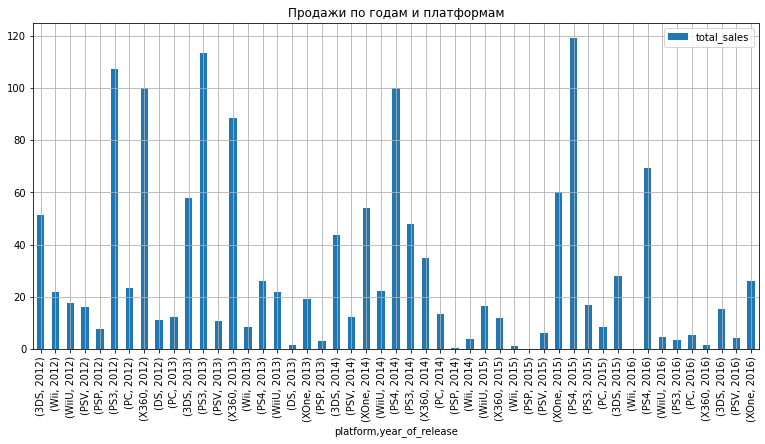

In [28]:
data_2012_hist =data_2012.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc= 'sum').sort_values(
    by='year_of_release').plot(kind='bar',grid='True', title = "Продажи по годам и платформам", figsize = (13,6))

#### Вывод


По продажам в 2015-2016 годах лидируют платформы: PS4, XOne, 3DS. Их считаю потенциально прибыльными. При этом сумма продаж в 2016 году снизилась по всем платформам.

Так же можно сделать вывод, что данные с 2012 года для наших целей анализировать неакттуально. Так как платформы, которые были лидерами до 2015 года: PS3, X360, сейчас таковыми не являются  потенциально прибыльными уже тоже считаться не могут. Поэтому далее при анализе актуальных для нас данных, буду брать только 2015-2016 года.

### Проанализировать продажи по платформам

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

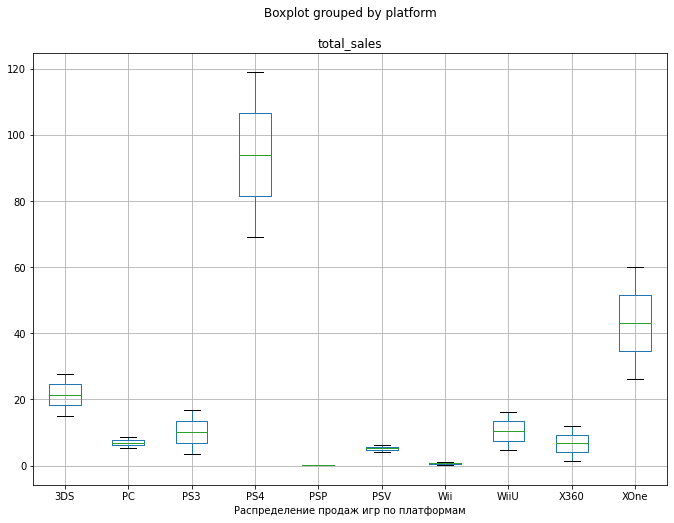

In [29]:
# построю график «ящик с усами» по данным за 2015-2016 года. ранее для нас рассматривать данные не имеет смысла
data_2015 = data[data['year_of_release'] >= 2015].reset_index(drop=True)
data_2015_boxplot = data_2015.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc= 'sum')

data_2015_boxplot.boxplot(column="total_sales", by="platform", figsize = (11,8))
plt.xlabel("Распределение продаж игр по платформам")
plt.show()

#### Вывод

Боксплот наглядно подтвердил вывод, который был сделан в прошлом пункте: по продажам в 2015-2016 годах лидируют платформы: PS4, XOne, 3DS. Медианные значения по ним имеют наибольшие показатели.

### Влияние отзывов на продажи по платформам

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах

In [30]:
# посмотрим корреляцию по PS4

data_2015_ps4 = data_2015[data_2015['platform'] == 'PS4'].reset_index(drop=True)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

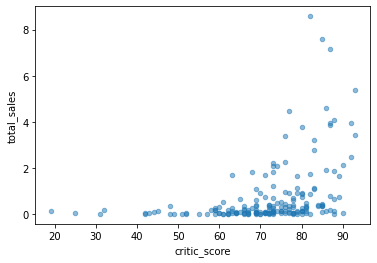

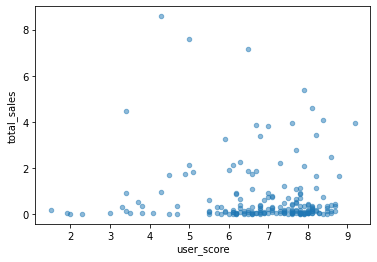

In [31]:
data_2015_ps4.sort_values('critic_score').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
data_2015_ps4.sort_values('user_score').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

In [32]:
print('Корреляция между оценкой критиков и продажами:', data_2015_ps4['total_sales'].corr(data_2015_ps4['critic_score']))
print('Корреляция между оценкой пользователей и продажами:', data_2015_ps4['total_sales'].corr(data_2015_ps4['user_score']))

Корреляция между оценкой критиков и продажами: 0.3928485555130601
Корреляция между оценкой пользователей и продажами: -0.05973845712638215


In [33]:
# посмотрим корреляцию по XOne

data_2015_xone = data_2015[data_2015['platform'] == 'XOne'].reset_index(drop=True)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

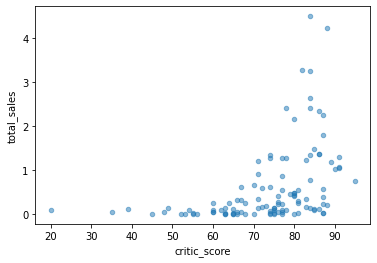

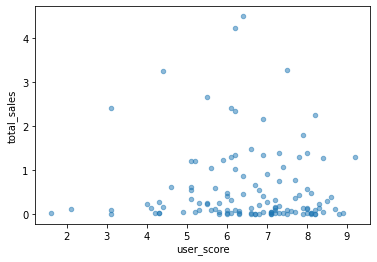

In [34]:
data_2015_xone.sort_values('critic_score').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
data_2015_xone.sort_values('user_score').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

In [35]:
print('Корреляция между оценкой критиков и продажами:', data_2015_xone['total_sales'].corr(data_2015_xone['critic_score']))
print('Корреляция между оценкой пользователей и продажами:', data_2015_xone['total_sales'].corr(data_2015_xone['user_score']))

Корреляция между оценкой критиков и продажами: 0.430888745821368
Корреляция между оценкой пользователей и продажами: -0.04146733387366271


In [36]:
# посмотрим корреляцию по 3DS

data_2015_3ds = data_2015[data_2015['platform'] == '3DS'].reset_index(drop=True)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

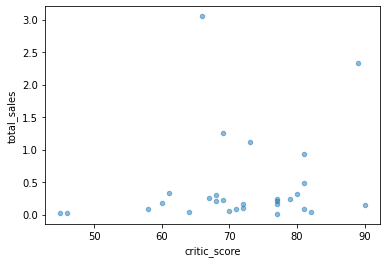

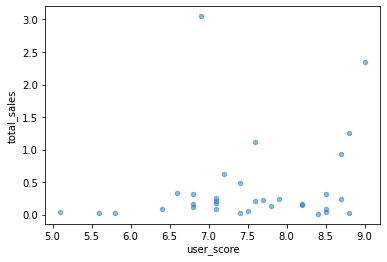

In [37]:
data_2015_3ds.sort_values('critic_score').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
data_2015_3ds.sort_values('user_score').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

In [38]:
print('Корреляция между оценкой критиков и продажами:', data_2015_3ds['total_sales'].corr(data_2015_3ds['critic_score']))
print('Корреляция между оценкой пользователей и продажами:', data_2015_3ds['total_sales'].corr(data_2015_3ds['user_score']))

Корреляция между оценкой критиков и продажами: 0.17757455046092874
Корреляция между оценкой пользователей и продажами: 0.19879627008102985


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

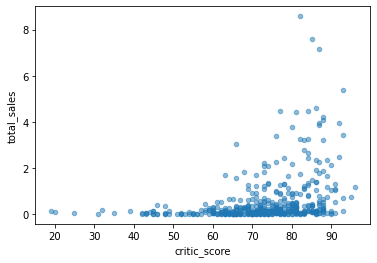

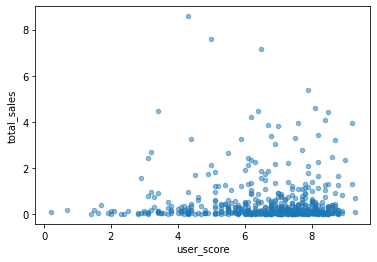

In [39]:
# и изучим корреляцию по всей актуальной выборке

data_2015.sort_values('critic_score').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
data_2015.sort_values('user_score').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

In [40]:
print('Корреляция между оценкой критиков и продажами:', data_2015['total_sales'].corr(data_2015['critic_score']))
print('Корреляция между оценкой пользователей и продажами:', data_2015['total_sales'].corr(data_2015['user_score']))

Корреляция между оценкой критиков и продажами: 0.32552662253933334
Корреляция между оценкой пользователей и продажами: -0.0019642931122463305


#### Вывод

Рассчеты показали, что корреляция между оценками критиков или пользователей и продажами по 3 лидирующим на данный момент платформам слабая. Диаграмма рассеяния это так же подтверждает.
При этом по 2 платформам корреляция между оценкой критиков и продажам больше, чем оценкой пользователей и теми же продажами: 0,4 и -0,05 соответственно.

Анализ всей выборки показал аналогичный результат: слабая корреляция продаж и оценок критиков и практически отсутствует между продажами и оценкой пользователей.

### Общее распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:title={'center':'Прибыльность жанров'}, xlabel='genre'>

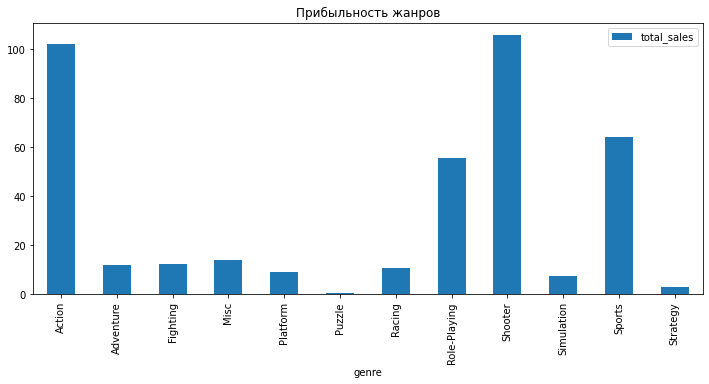

In [41]:
data_2015.pivot_table(index='genre', values='total_sales', aggfunc= 'sum').plot(kind='bar', title = "Прибыльность жанров", figsize = (12,5))

#### Вывод

Выделяются жанры с высокими продажами: Action и Shooter, потом идут Sports и Role-Playing;
с самыми низкими - Puzzle и Strategy, хотя продажи по остальным жанрам тоже небольшие.

## Составьте портрет пользователя каждого региона

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,7.39,23.55,10.31,1.67
PC,9.10,0.00,3.72,0.95
PS3,7.30,4.97,5.66,2.49
PS4,83.54,12.05,63.86,28.70
PSP,0.00,0.12,0.00,0.00
PSV,1.08,8.41,0.54,0.47
Wii,0.73,0.00,0.49,0.10
WiiU,6.49,4.12,8.86,1.48
X360,4.21,0.00,8.05,1.22


<AxesSubplot:xlabel='platform'>

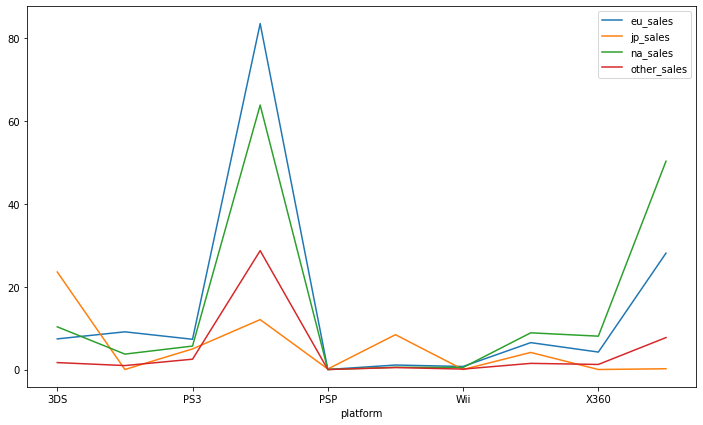

In [42]:
sales_region = data_2015.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc= 'sum').sort_values(
    by='platform')
display(sales_region)
sales_region.plot(figsize=(12,7))

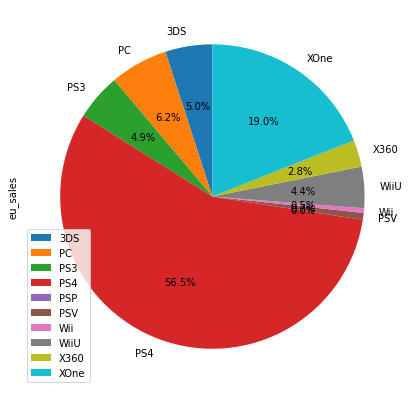

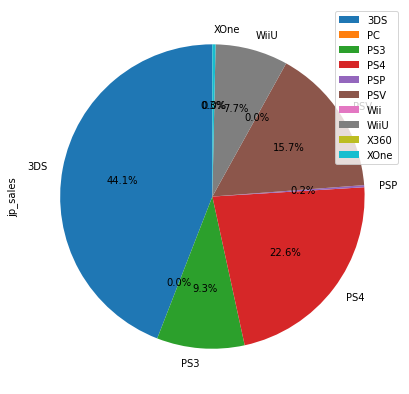

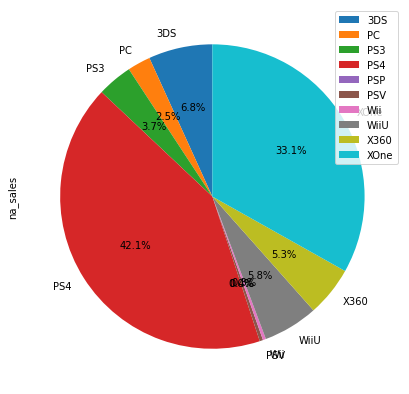

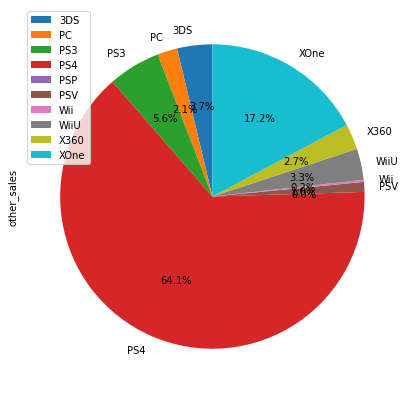

In [43]:
sales_region.plot.pie(y='eu_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=90)
sales_region.plot.pie(y='jp_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=90)
sales_region.plot.pie(y='na_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=90)
sales_region.plot.pie(y='other_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=90)

plt.show()

### Вывод

В Европе наиболее популярны платформы:
1. PS4 56,5%
2. XOne 19%
3. PC 6,2%
3. 3DS 5%
4. PS3 4,9%

В Японии:
1. 3DS 44,1%
2. PS4 22,6%
3. PSV 15,7%
4. PS3 9,3%
5. WiiU 7,7%

В Северной Америке:
1. PS4 42,1%
2. XOne 33,1%
3. 3DS 6,8%
4. WiiU 5,8%
5. X360 5,3%

В других странах:
1. PS4 64,1%
2. XOne 17,2%
3. PS3 5,6%
3. 3DS 3,7%
4. WiiU 3,3%

Различия в долях продаж по регионам есть. Схожи топ-5 платформ в Европе, Северной Америке и в других странах(кроме еще Японии). В этих 3 регионах лидируют PS4 и XOne в разных пропорциях, в общем, на эти 2 платформы приходится 75-80% продаж и остальные платформы, входящие по популярности в Топ-5, имеют гораздо меньшие доли.

В Японии картина немного другая. Платформы на рынке распределены более равномерно, лидируют 3DS, PS4 и PSV.

In [44]:
genre_region = data_2015.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc= 'sum').sort_values(
    by='total_sales',ascending=False)

genre_region

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Shooter,40.28,3.79,48.18,13.48,105.73
Action,34.82,23.05,33.68,10.58,102.13
Sports,27.82,1.65,26.31,8.55,64.33
Role-Playing,17.21,13.41,19.82,5.38,55.82
Misc,4.26,3.19,5.58,1.14,14.17
Fighting,3.72,1.54,5.54,1.57,12.37
Adventure,4.67,2.22,3.84,1.25,11.98
Racing,6.52,0.29,2.82,1.23,10.86
Platform,3.20,1.42,3.78,0.88,9.28


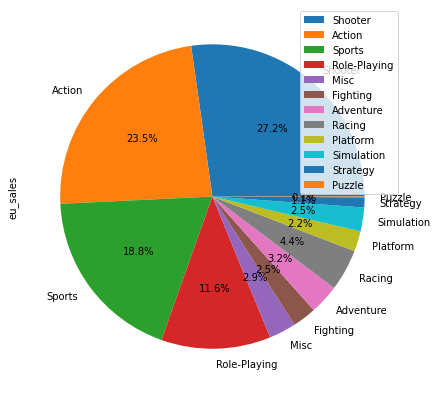

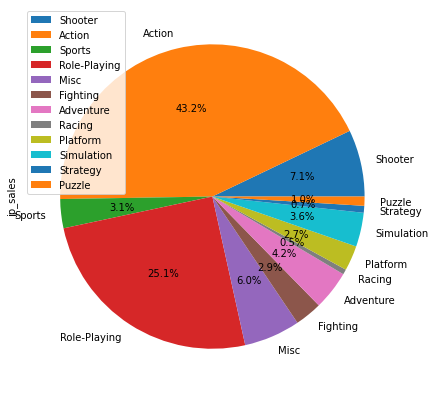

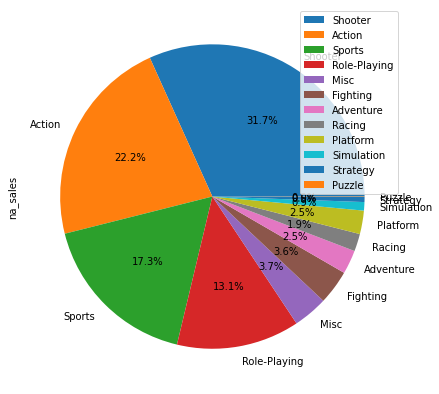

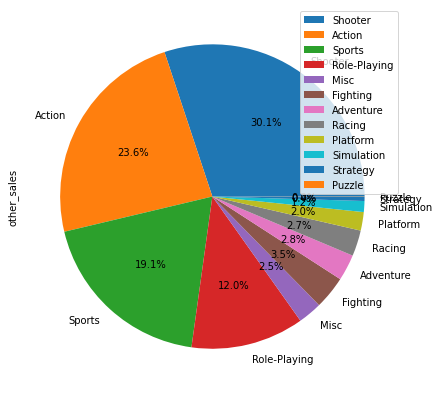

In [45]:
genre_region.plot.pie(y='eu_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=0)
genre_region.plot.pie(y='jp_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=0)
genre_region.plot.pie(y='na_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=0)
genre_region.plot.pie(y='other_sales',figsize=(7, 7),autopct='%1.1f%%', startangle=0)

plt.show()

### Вывод

Самые популярные жанры в Европе:
1. Shooter 27,2%
2. Action 23,5%
3. Sports 18,8%
4. Role-Playing 11,6%

В Японии:
1. Action 43,2%
2. Role-Playing 25,1%

В Северной Америке:
1. Shooter 31,7%
2. Action 22,2%
3. Sports 17,3%
4. Role-Playing 13,1%

В других странах:
1. Shooter 30,1%
2. Action 23,6%
3. Sports 19,1%
4. Role-Playing 12%

Не стала выбирать именно Топ-5, потому что по результатам анализа доля других жанров значительно меньше.
По итогам можно сказать, что популярные жанры везде, кроме Японии, одинаковы, одинаковы даже их доли продаж.
В Японии наиболее популярны только 2 жанра, Action и Role-Playing, в сумме 68% от продаж по всем жанрам. 

In [46]:
esrb_region = data_2015.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc= 'sum').sort_values(
    by='total_sales',ascending=False)

esrb_region

,eu_sales,jp_sales,na_sales,other_sales,total_sales
rating,,,,,
M,45.54,4.29,47.03,14.24,111.10
E,34.83,5.25,26.59,8.57,75.24
T,20.32,7.70,22.86,6.85,57.73
E10+,11.54,3.27,17.87,4.00,36.68


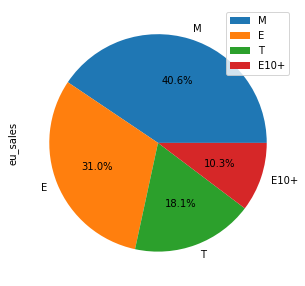

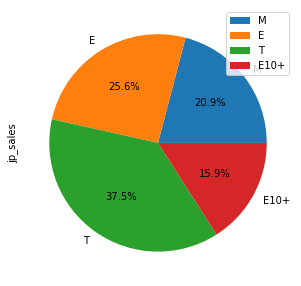

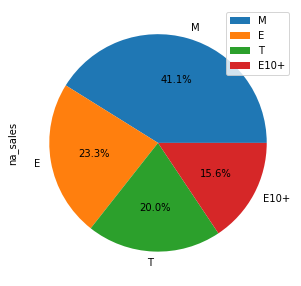

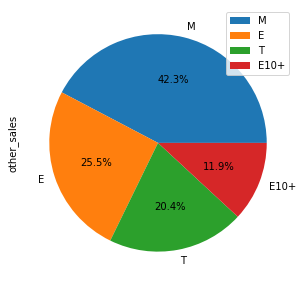

In [47]:
esrb_region.plot.pie(y='eu_sales',figsize=(5, 5),autopct='%1.1f%%', startangle=0)
esrb_region.plot.pie(y='jp_sales',figsize=(5, 5),autopct='%1.1f%%', startangle=0)
esrb_region.plot.pie(y='na_sales',figsize=(5, 5),autopct='%1.1f%%', startangle=0)
esrb_region.plot.pie(y='other_sales',figsize=(5, 5),autopct='%1.1f%%', startangle=0)

plt.show()

### Вывод

Рейтинг ESRB, расшифровка:

M (Mature 17+) — от 17 лет

E - everyone - для всех

T (Teen) — для подростков 13-19 лет

E10+ (Everyone 10+) — для всех старше 10 лет

И в этот раз, статистика по Японии отличается от других стран. 
Так в Японии наиболее популярны игры для подростков 13-19 лет, 37,5% от всех продаж. Далее идут игры для всех и от 17 лет.

По остальным странам статистика схожа: наиболее популярны игры от 17 лет, примерно 40% от всех продаж по региону, потом идут игры для всех, 25-30%, потом для подростков от 13 до 19 лет, в среднем 20%.

Общее для всех стран, что наименьшей популярностью пользуются игры для всех старше 10 лет, 10-15%.

## Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [48]:
# Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны
# H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны

xone = data_2015[data_2015['platform'] == 'XOne']['user_score']

pc = data_2015[data_2015['platform'] == 'PC']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(xone, pc, equal_var = False, nan_policy ='omit')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.2946308864003399
Не получилось отвергнуть нулевую гипотезу


In [49]:
# проверю

print('Средний пользовательский рейтинг Xone:', xone.mean())
print('Средний пользовательский рейтинг PC:', pc.mean())

Средний пользовательский рейтинг Xone: 6.542148760330578
Средний пользовательский рейтинг PC: 6.296428571428573


In [50]:
# Н0 - Средние пользовательские рейтинги жанров Action и Sports равны
# H1 - Средние пользовательские рейтинги жанров Action и Sports не равны

action = data_2015[data_2015['genre'] == 'Action']['user_score']

sports = data_2015[data_2015['genre'] == 'Sports']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(action, sports, equal_var = False, nan_policy ='omit')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.97163549920592e-10
Отвергаем нулевую гипотезу


In [51]:
# проверю

print('Средний пользовательский рейтинг Action:', action.mean())
print('Средний пользовательский рейтинг Sports:', sports.mean())

Средний пользовательский рейтинг Action: 6.808290155440415
Средний пользовательский рейтинг Sports: 5.198780487804878


### Вывод

Были проверены гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Обе они подтвердились.
H0 в обоих случаях была о том, что сравниваемые данные равны, H1, о том, что различаются.
Анализировались две независимые выборки, поэтому использовался st.ttest_ind

## Напишите общий вывод

1. Больше всего игр выпускалось в 2005-2011 годах.
2. Продажи по платформам начали расти с 1996 года и пик пришелся на 2008-2009 года. Дальше шел спад.
3. Платформы с наибольшими суммарными продажами:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'
4. Характерный срок, когда появляются новые и исчезают старые платформы по результатам анализа всей выборки - от 0 до 10 лет, в среднем, 7,5 лет. При этом, если смотреть графики Топ-6 платформ за все время, то пик продаж игр на платформу составляет 3-4 года.
5. Далее проводился анализ по данным с 2015 года, так как платформы, которые были лидерами ранее, сейчас таковыми не являются потенциально прибыльными уже тоже считаться не могут.
6. По продажам в 2015-2016 годах лидируют платформы: PS4, XOne, 3DS. Их считаю потенциально прибыльными. При этом сумма продаж в 2016 году снизилась по всем платформам.
7. Анализ показал, что корреляция между оценками критиков или пользователей и продажами слабая и по всей выборке, и по лидирующим платформам. 
8. Выделяются жанры с высокими продажами: Action и Shooter, потом идут Sports и Role-Playing; с самыми низкими - Puzzle и Strategy, хотя продажи по остальным жанрам тоже небольшие.
9. В Европе наиболее популярны платформы:
PS4 56,5%,
XOne 19%,
PC 6,2%,
3DS 5%,
PS3 4,9%

В Японии:
3DS 44,1%,
PS4 22,6%,
PSV 15,7%,
PS3 9,3%,
WiiU 7,7%

В Северной Америке:
PS4 42,1%,
XOne 33,1%,
3DS 6,8%,
WiiU 5,8%,
X360 5,3%

В других странах:
PS4 64,1%,
XOne 17,2%,
PS3 5,6%,
3DS 3,7%,
WiiU 3,3%

Различия в долях продаж по регионам есть. Схожи топ-5 платформ в Европе, Северной Америке и в других странах(кроме еще Японии). В этих 3 регионах лидируют PS4 и XOne в разных пропорциях, в общем, на эти 2 платформы приходится 75-80% продаж и остальные платформы, входящие по популярности в Топ-5, имеют гораздо меньшие доли.
В Японии картина немного другая. Платформы на рынке распределены более равномерно, лидируют 3DS, PS4 и PSV.

10. Самые популярные жанры в Европе:
Shooter 27,2%,
Action 23,5%,
Sports 18,8%,
Role-Playing 11,6%

В Японии:
Action 43,2%,
Role-Playing 25,1%

В Северной Америке:
Shooter 31,7%,
Action 22,2%,
Sports 17,3%,
Role-Playing 13,1%

В других странах:
Shooter 30,1%,
Action 23,6%,
Sports 19,1%,
Role-Playing 12%

Популярные жанры везде, кроме Японии, одинаковы, одинаковы даже их доли продаж. В Японии наиболее популярны только 2 жанра, Action и Role-Playing, в сумме 68% от продаж по всем жанрам.

11. И в этот раз, статистика по Японии отличается от других стран. Так в Японии наиболее популярны игры для подростков 13-19 лет, 37,5% от всех продаж. Далее идут игры для всех и от 17 лет. По остальным странам статистика схожа: наиболее популярны игры от 17 лет, примерно 40% от всех продаж по региону, потом идут игры для всех, 25-30%, потом для подростков от 13 до 19 лет, в среднем 20%. Общее для всех стран, что наименьшей популярностью пользуются игры для всех старше 10 лет, 10-15%.

12. Были проверены гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Обе они подтвердились. 


Определяющие успешность игры закономерности:
1. Самая популярная платформа по всему миру - PS4. Так же популярна 3DS в Японии и XOne в остальных странах. Это наиболее выгодные платформы.
2. Самые популярные жанры - Shooter, Action, Sports, Role-Playing. В Японии стоит сделать ставку только на 2 из них - Action и Role-Playing.
3. Наименьшей популярностью пользуются игры для всех старше 10 лет, 10-15%. В Японии больше всего популярны игры для подростков 13-19 лет, в остальных странах - игры от 17 лет.